In [1]:
import pickle

from classifier import *
from preprocessing import *
from staff_removal import *
from helper_methods import *

In [2]:
img_path = f'dilated.png'
img = cv2.imread(img_path, 0)
img = 255 - img

img = clean_and_cut(img)
# img = clean_rabbish(img)
# img = cut_shape_only(img)

cv2.imwrite(f'1{img_path}', img)

True

In [3]:
# Get paths of scaned and captured test cases #
scanned_path = './test-cases/test-set-scanned/scanned'
captured_path = './test-cases/test-set-camera-captured/captured'

img_filenames = os.listdir(scanned_path)
for i, fn in enumerate(img_filenames):
    test_number = fn.split('.')[0]

In [4]:
def preprocess_img(img_path, output_path):
    # 1. Read desired image #
    img = cv2.imread(img_path, 0)
    
    # 2. Remove noise (odd pixels) from the image and save it #
    img = cv2.fastNlMeansDenoising(img, None, 10, 7, 21)
    cv2.imwrite('testing-output/{}/1. noise_removed.png'.format(output_path), img)

    # 3. Binarize image using combination of (global + otsu) thresholding and save it #
    threshold, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    cv2.imwrite('testing-output/{}/2. binarized.png'.format(output_path), img)

    # 4. Return image shape (width, height) and processed image # 
    n, m = img.shape
    return n, m, img

## Steps of processing
1. ~Apply Pre-processing~
2. ~Remove Staff lines~
3. ~Cut images into buckets~
4. ~Get reference line for each bucket~
5. ~Segment symbols, Sort them by x-value~
6. Classify symbol

## Loading dataset

In [5]:
print('Loading dataset. This will take time ...')
features, labels = load_dataset('hog')
print('Finished loading dataset.')

train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, test_size=0.2, random_state=random_seed)

Loading dataset. This will take time ...
finished processing:  a_1
finished processing:  a_16
finished processing:  a_16_flipped
finished processing:  a_1_flipped
finished processing:  a_2
finished processing:  a_2_flipped
finished processing:  a_32
finished processing:  a_4
finished processing:  a_4_flipped
finished processing:  a_8
finished processing:  a_8_flipped
finished processing:  barline
finished processing:  b_16
finished processing:  b_8
finished processing:  c
finished processing:  chord_2
finished processing:  chord_3
finished processing:  chord_3_2
finished processing:  d
finished processing:  dot
finished processing:  e
finished processing:  f
finished processing:  symbol_bb
finished processing:  t_2
finished processing:  t_4
finished processing:  t_4_2
finished processing:  t_4_4
finished processing:  z
Finished loading dataset.


## Training and saving the model

In [6]:
model_name = 'SVM'
model = run_experiment(train_features, test_features, train_labels, test_labels, model_name)

filename = f'{model_name}.sav'
pickle.dump(model, open(filename, 'wb'))
 
# TODO: Use this line to load the model 
# loaded_model = pickle.load(open(filename, 'rb'))

############## Training SVM ##############
SVM accuracy: 99.048968029138 %


## Testing 

['z']


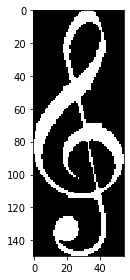

['a_2']


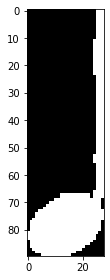

['a_32']


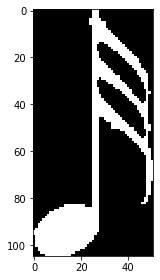

['a_2_flipped']


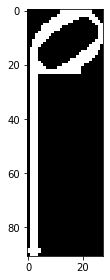

['a_2']


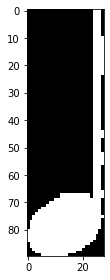

['chord_2']


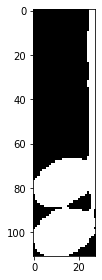

['a_2']


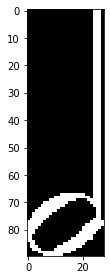

['a_8']


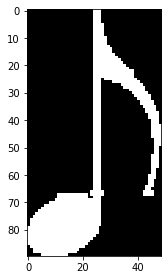

['a_4']


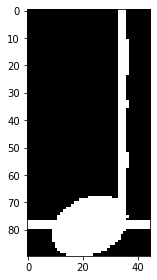

['a_16']


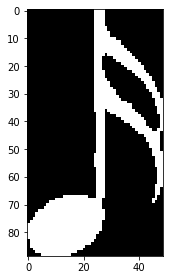

['a_2']


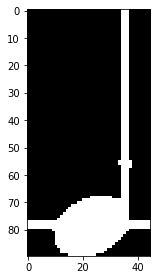

['a_1']


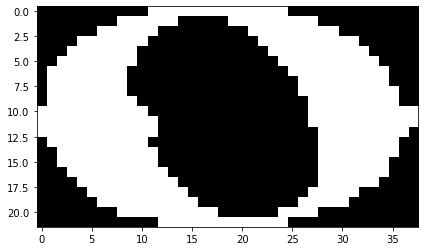

['barline']


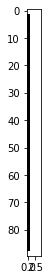

['barline']


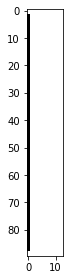

['a_2_flipped']


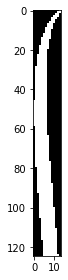

['barline']


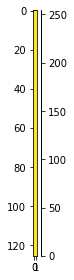

['z']


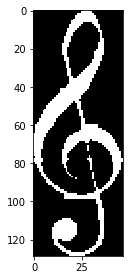

['t_4']


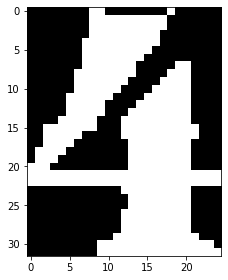

['t_4']


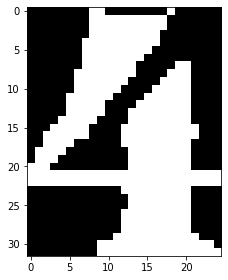

['a_4']


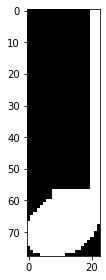

['a_32']


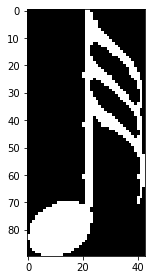

['a_2_flipped']


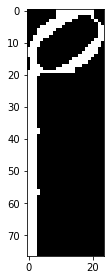

['a_8']


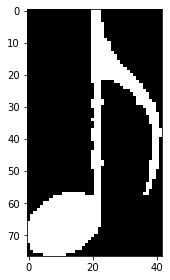

['a_16']


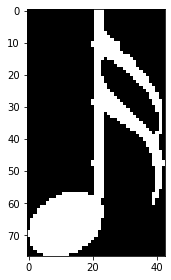

['a_32']


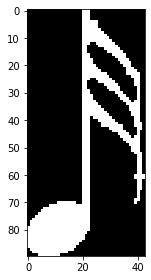

['c']


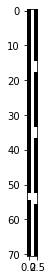

['chord_2']


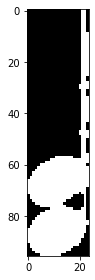

['a_2']


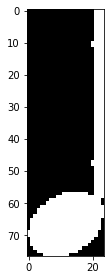

['b_8']


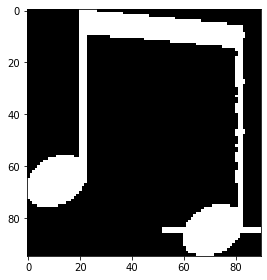

['a_32']


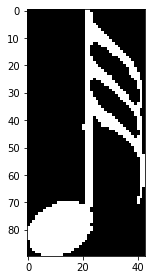

['a_32']


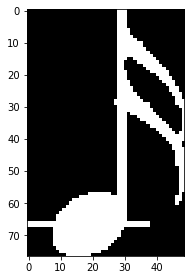

['a_32']


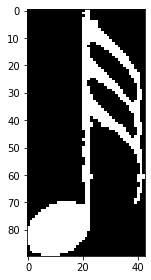

['c']


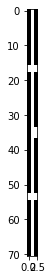

['barline']


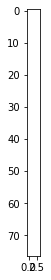

['barline']


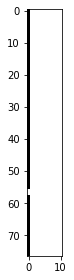

['barline']


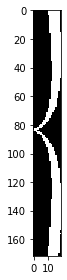

['barline']


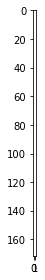

['z']


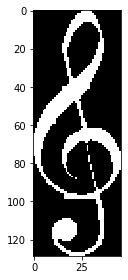

['t_4']


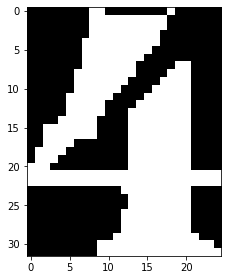

['t_4']


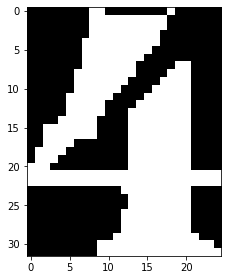

['chord_3']


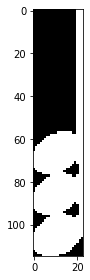

['b_8']


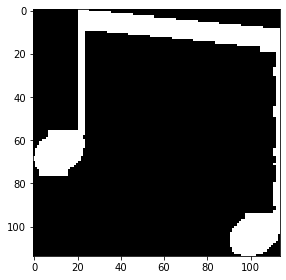

['b_16']


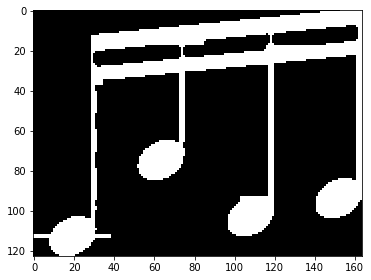

['b_16']


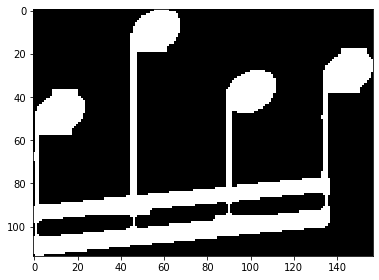

['barline']


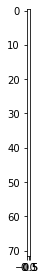

['barline']


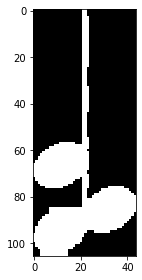

['a_4']


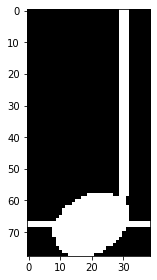

['a_4']


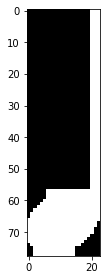

['c']


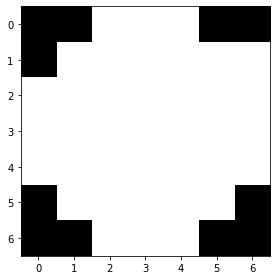

['a_8']


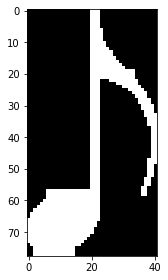

['barline']


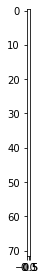

['a_16']


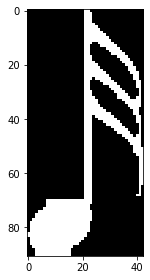

['c']


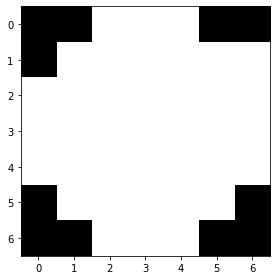

['a_1']


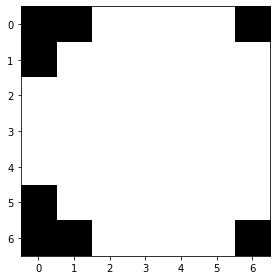

['barline']


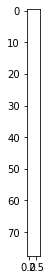

['barline']


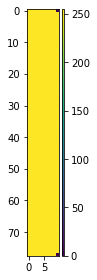

['barline']


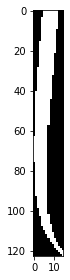

['barline']


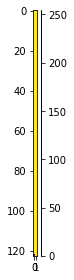

['z']


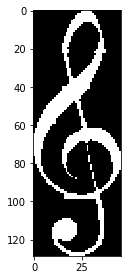

['t_4']


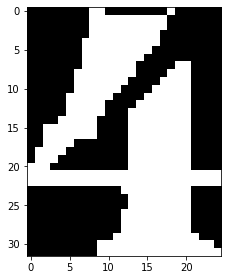

['t_4']


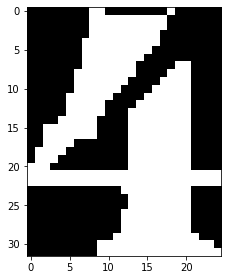

['b_16']


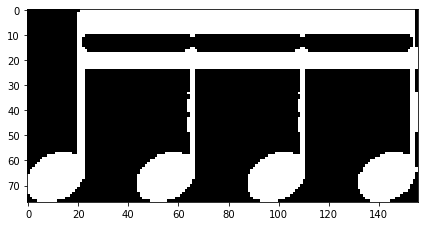

['a_4']


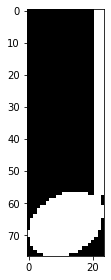

['c']


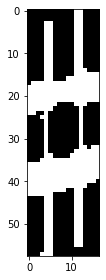

['a_4']


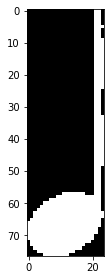

['a_4']


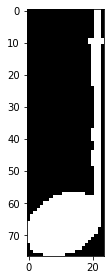

['barline']


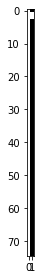

['symbol_bb']


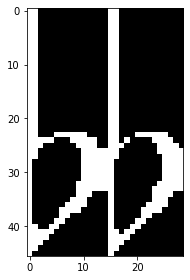

['a_4']


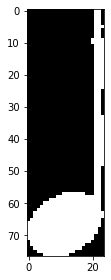

['d']


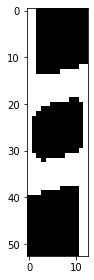

['a_4']


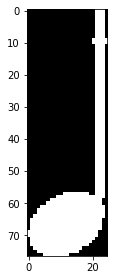

['c']


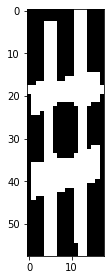

['barline']


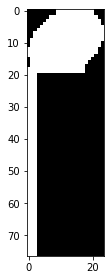

['barline']


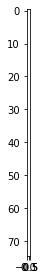

['barline']


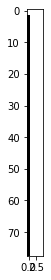

['barline']


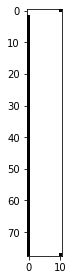

['z']


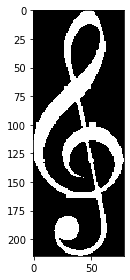

['barline']


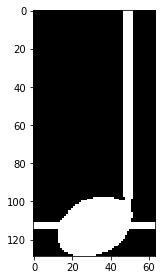

['a_2']


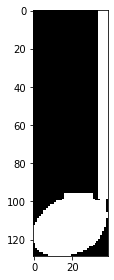

['a_2']


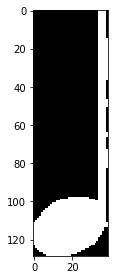

['a_2']


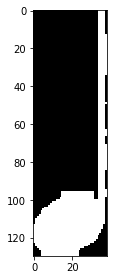

['a_2']


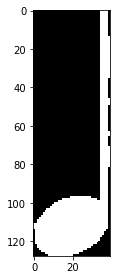

['a_2']


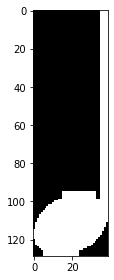

['barline']


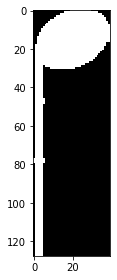

['barline']


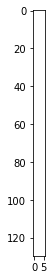

['barline']


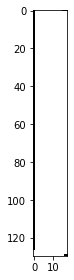

['z']


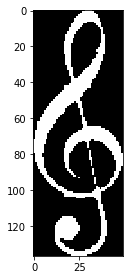

['a_2']


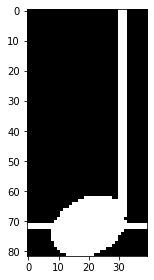

['a_2']


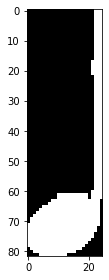

['a_2']


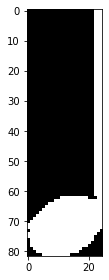

['a_4']


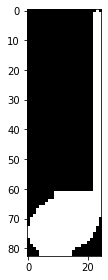

['a_2']


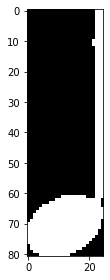

['a_2']


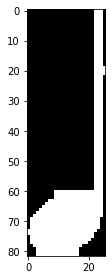

['barline']


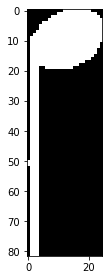

['barline']


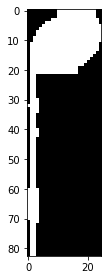

['barline']


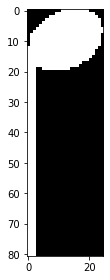

['barline']


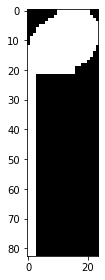

['barline']


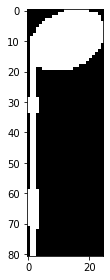

['barline']


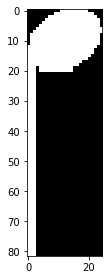

['barline']


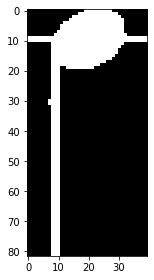

['c']


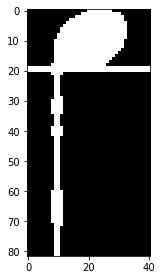

['barline']


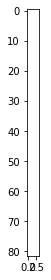

['barline']


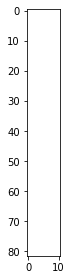

['z']


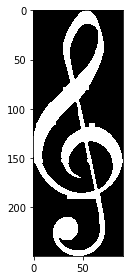

['c']


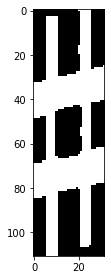

['a_2']


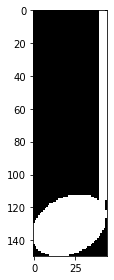

['e']


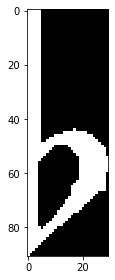

['a_2']


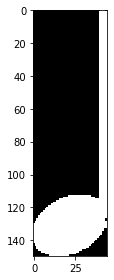

['d']


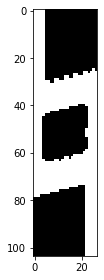

['a_2']


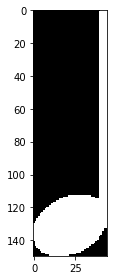

['c']


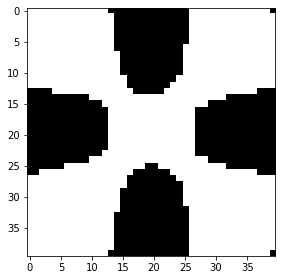

['a_2']


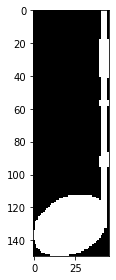

['symbol_bb']


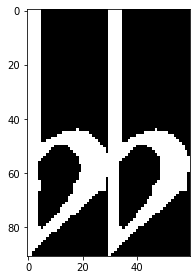

['a_2']


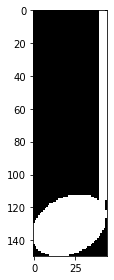

['barline']


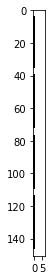

['barline']


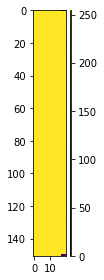

['z']


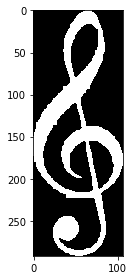

['a_4']


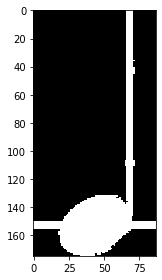

['a_4']


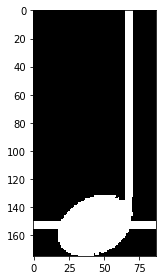

['a_2_flipped']


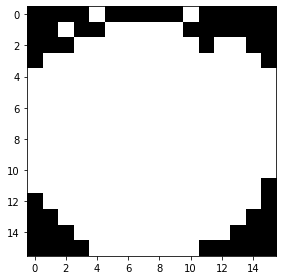

['a_4']


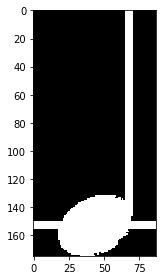

['a_2_flipped']


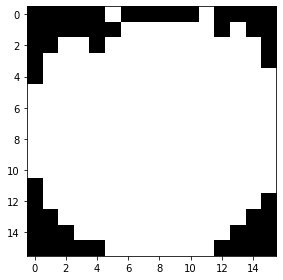

['dot']


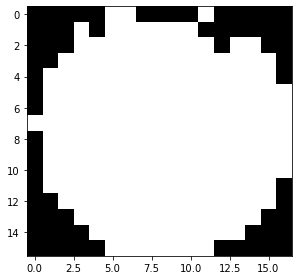

['barline']


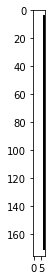

['barline']


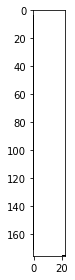

['z']


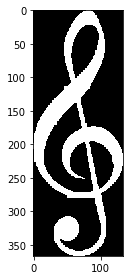

['chord_3']


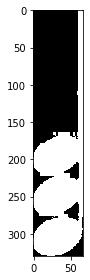

['chord_3']


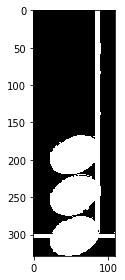

['barline']


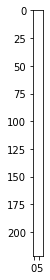

['barline']


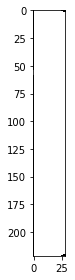

['z']


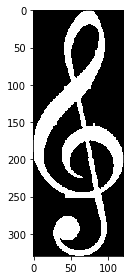

['barline']


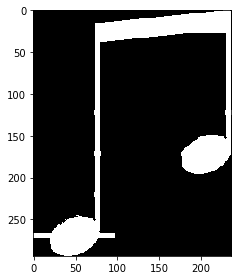

['b_8']


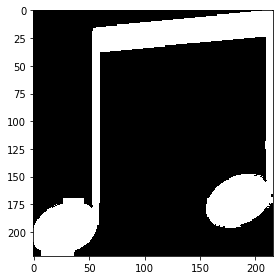

['barline']


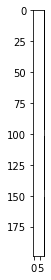

['barline']


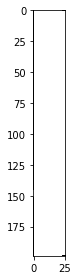

['z']


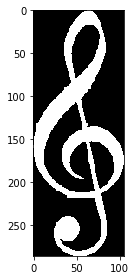

['b_16']


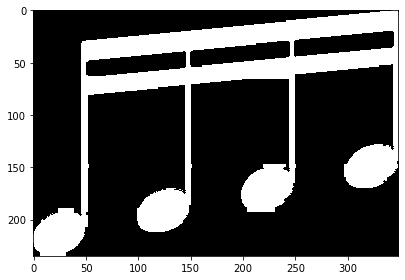

['b_16']


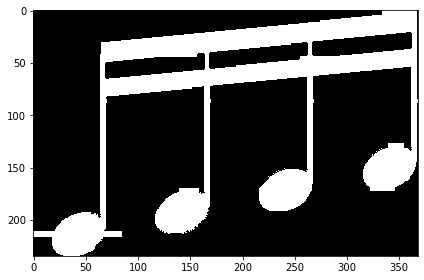

['barline']


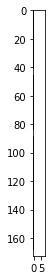

['barline']


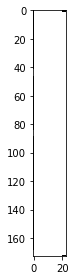

['z']


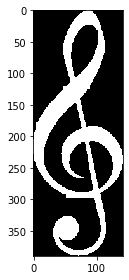

['a_4_flipped']


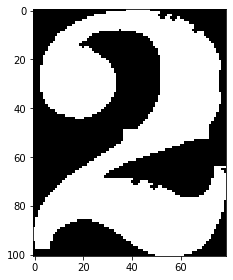

['t_4']


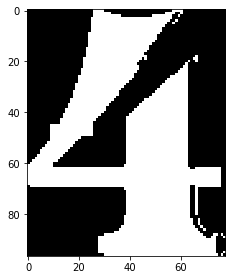

['a_2']


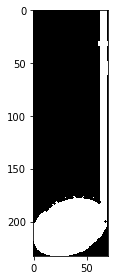

['barline']


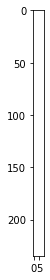

['barline']


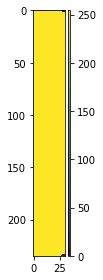

In [15]:
# Threshold for line to be considered as an initial staff line #
threshold = 0.8

for i in ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10']:
    try: 
        os.mkdir('testing-output/{}'.format(i)) 
    except OSError as error: 
        pass

    # Get image and its dimensions#
    height, width, in_img = preprocess_img('{}/{}.png'.format(scanned_path, i), '{}'.format(i))
    
    # Get line thinkness and list of staff lines #
    staff_lines_thicknesses, staff_lines = get_staff_lines(width, height, in_img, threshold)

#     TODO: remove after finishing classification
#     print('test image {}'.format(i))
#     print('staff_lines: ', staff_lines)
#     print('staff_lines_thicknesses: ', staff_lines_thicknesses, end='\n\n')

    # Remove staff lines from original image #
    cleaned = remove_staff_lines(in_img, width, staff_lines, staff_lines_thicknesses)
    cv2.imwrite('testing-output/{}/3. cleaned.png'.format(i), cleaned)
    
    # Get list of cutted buckets and cutting positions #
    cut_positions, cutted = cut_image_into_buckets(cleaned, staff_lines)
    
    
    # Get reference line for each bucket #
    ref_lines = get_ref_lines(cut_positions, staff_lines)
    
#     print('ref_lines: ', ref_lines)
    
    for it in range(len(cutted)):
        cur_img = cutted[it].copy()
        symbols_boundries = segmentation(cutted[it])
        symbols_boundries.sort(key = lambda x: (x[0], x[1]))
        
        symbols = []
        for boundry in symbols_boundries:
            # Get the current symbol #
            x1, y1, x2, y2 = boundry
            cur_symbol = cutted[it][y1:y2+1, x1:x2+1]
            
            # Clean and cut #
            cur_symbol = clean_and_cut(cur_symbol)
            # cur_symbol = 255 - cur_symbol

            # Start prediction of the current symbol #
            feature = extract_features(cur_symbol, 'hog')
            print(model.predict([feature]))
            
            io.imshow(cur_symbol)
            io.show()
            
        cv2.imwrite(f'testing-output/{i}/4. cutted-{it + 1}.png', cutted[it])
        cv2.imwrite(f'testing-output/{i}/5. cutted-segmented-{it + 1}.png', cur_img)

## Removing all contours but the largest one

In [7]:
path = 'bad dataset\\augment\\augment0'
img_filenames = os.listdir(path)

for i, fn in enumerate(img_filenames):
    img_path = f'{path}/{fn}'
    img = cv2.imread(img_path, 0)

    if fn != '':
        img[img > 200] = 255
        img[img <= 200] = 0

        contours, _ = cv.findContours(img, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
        mask = np.ones((img.shape[0] , img.shape[1]), dtype="uint8") * 255
        contours = sorted(contours, key=cv.contourArea)

        for i in range(len(contours) - 1):
            cv.drawContours(mask, [contours[i]], -1, 0, -1)
        
        img = cv.bitwise_and(img, img, mask=mask)

        cv2.imwrite(img_path, img)

## Cutting the shapes without any additional spaces 

In [8]:
path = 'bad dataset\\augment\\augment3'
img_filenames = os.listdir(path)

for i, fn in enumerate(img_filenames):
    img_path = f'{path}/{fn}'
    img = cv2.imread(img_path, 0)

    if fn != '':
        img[img > 200] = 255
        img[img <= 200] = 0

        white = np.argwhere(img == 255)

        x, y, w, h = cv2.boundingRect(white)
        img = img[x:x+w, y:y+h]

        cv2.imwrite(img_path, img)
        # io.imshow(img)
        # io.show()

## Negative transformation

In [9]:
base_path = 'data-set'

for folder in ['t_2', 't_4']:
    path = f'{base_path}/{folder}'
    img_filenames = os.listdir(path)

    for i, fn in enumerate(img_filenames):
        if fn != '':
            img_path = f'{path}/{fn}'
            img = cv2.imread(img_path, 0)

            img = 255 - img

            cv2.imwrite(img_path, img)

In [19]:
folders_path = 'data-set'
folders = os.listdir(folders_path)

for folder in folders:
    folder_path = f'{folders_path}/{folder}'
    img_filenames = os.listdir(folder_path)

    for i, fn in enumerate(img_filenames):
        img_path = f'{folder_path}/{fn}'
        img = cv2.imread(img_path, 0)

        if fn != '':
            img = 255 - img
            img = clean_and_cut(img)
            cv2.imwrite(img_path, img)

In [23]:
base_path = 'data-set'

for folder in ['a_16']:
    path = f'{base_path}/{folder}'
    img_filenames = os.listdir(path)

    for i, fn in enumerate(img_filenames):
        if fn != '':
            img_path = f'{path}/{fn}'
            img = cv2.imread(img_path, 0)

            img = cv2.rotate(img, cv2.ROTATE_180)
            
            cv2.imwrite(f'{base_path}/a_16_flipped/{fn}', img)